In [1]:
%load_ext autoreload
%autoreload 2

import prody_ as pr
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ase
from ase import io
from ase.visualize import view
from pathlib import Path

In [2]:
import prody_ as pr
#Parameters
sequence="GLY"
temp=[298]
wb=False
name=[]
for iii in range(10):
    name.append(sequence+str(temp)+str(iii))
print(name)

dataframe = pr.load_csv(sequence, temp, wb)
#pr.get_graphs(sequence, temp, wb)
#select parts arguments: (s, t, wb)
#pr.selectcsv(sequence, temp, wb)
datalist = list(dataframe["Unnamed: 0"])

['GLY[298]0', 'GLY[298]1', 'GLY[298]2', 'GLY[298]3', 'GLY[298]4', 'GLY[298]5', 'GLY[298]6', 'GLY[298]7', 'GLY[298]8', 'GLY[298]9']
works


In [3]:
datacsvs = [Path(f"datacsv/{_}.csv") for _ in datalist]

<AxesSubplot:xlabel='phi', ylabel='psi'>

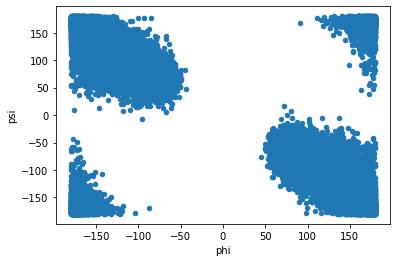

In [4]:
data = [pd.read_csv(_) for _ in datacsvs]
# test_df = data[0]
test_df = pd.concat(data)
test_df.plot.scatter("phi", "psi")

In [5]:
np.deg2rad(360)

6.283185307179586

In [6]:
def phi_psi_torus(phi, psi, r=2, R=3, deg2rad=False):
    """
    """
    if deg2rad:
        phi = np.deg2rad(phi)
        psi = np.deg2rad(psi)
    
    x = (R + r * np.cos(phi)) * np.cos(psi)
    y = (R + r * np.cos(phi)) * np.sin(psi)
    z = r * np.sin(phi)
    return x,y,z

In [7]:
x,y,z = phi_psi_torus(test_df["phi"], test_df["psi"])

In [8]:
zeroTo2pi = np.arange(-np.pi, np.pi, 0.1)
# zeroTo2pi = np.arange(-180, 180, 15)
# x,y,z = phi_psi_torus(zeroTo2pi, zeroTo2pi)

In [9]:
import itertools
#                          
phi, psi = np.array(list(itertools.product(zeroTo2pi,zeroTo2pi))).T
# phi, psi
# x,y,z = phi_psi_torus(phi, psi, deg2rad=False)
x,y,z = phi_psi_torus(phi, psi, deg2rad=False)

In [12]:
TORUS = pd.DataFrame({"x": x, "y": y, "z": z})
TORUS

,x,y,z
0,-1.000000,-1.224647e-16,-2.449294e-16
1,-0.995004,-9.983342e-02,-2.449294e-16
2,-0.980067,-1.986693e-01,-2.449294e-16
3,-0.955336,-2.955202e-01,-2.449294e-16
4,-0.921061,-3.894183e-01,-2.449294e-16
...,...,...,...
3964,-0.891644,4.678153e-01,1.661788e-01
3965,-0.933893,3.764623e-01,1.661788e-01
3966,-0.966811,2.813479e-01,1.661788e-01
3967,-0.990069,1.834223e-01,1.661788e-01


In [13]:
Tnp = TORUS.to_numpy()

In [15]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

kmeans = KMeans(n_clusters=4, random_state=0).fit(test_df)
dbscan = DBSCAN(eps=3, min_samples=3).fit(test_df)

ValueError: could not convert string to float: 'gly'

In [16]:
plt.clf()
plt.scatter(TORUS["x"], TORUS["y"], c=kmeans.labels_)

NameError: name 'kmeans' is not defined

<Figure size 432x288 with 0 Axes>

In [17]:
kmeans.labels_

NameError: name 'kmeans' is not defined

In [18]:
# plt.scatter(phi, psi)
plt.scatter(np.deg2rad(test_df["phi"]), 
            np.deg2rad(test_df["psi"]), c=kmeans.labels_, alpha=3)
# plt.xlim(-180, 180)
# plt.ylim(-180, 180)


NameError: name 'kmeans' is not defined

In [19]:
# plt.hist2d(np.deg2rad(test_df["phi"]), np.deg2rad(test_df["psi"]))


In [20]:
# counts, bounds1, bounds2, __ = plt.hist2d(np.deg2rad(test_df["phi"]), np.deg2rad(test_df["psi"]))

In [21]:
# counts

In [22]:
# bounds1 

In [23]:
# bounds2

In [24]:
phi.shape

(3969,)

In [25]:
PHIrad = np.deg2rad(test_df["phi"])
PSIrad = np.deg2rad(test_df["psi"])

In [26]:
X = np.array([PHIrad, PSIrad]).T

In [27]:
# X.shape

In [28]:
from sklearn.neighbors import KernelDensity
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X)

In [29]:
Xgrid = np.array([phi, psi]).T

In [30]:
Xgrid.shape

(3969, 2)

In [31]:
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html#sklearn.neighbors.KernelDensity
COLORs = kde.score_samples(Xgrid)

In [32]:
data[0]
lengths = [len(_) for _ in data]
lengths

[5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]

In [33]:
keys = []
frames = []
for d, key in zip(data, datacsvs):
    k = key.stem
    keys.extend([k]*len(d))
    frames.extend(list(range(len(d))))
    

In [34]:
probabilities = pd.DataFrame(
{
 "loglik": kde.score_samples(X),
    "phi": X[:,0],
    "psi": X[:,1],
    "key": keys,
    "frame": frames,
    # "":,
    
}
)

In [35]:
probabilities

,loglik,phi,psi,key,frame
0,-4.721090,2.169619,-3.068985,09800e0a-c0b7-4ad5-9912-4ab24810708d,0
1,-2.489259,3.068885,-2.508028,09800e0a-c0b7-4ad5-9912-4ab24810708d,1
2,-3.213067,-2.787791,-2.595446,09800e0a-c0b7-4ad5-9912-4ab24810708d,2
3,-2.379774,2.864051,2.854787,09800e0a-c0b7-4ad5-9912-4ab24810708d,3
4,-2.477080,-2.568840,2.950758,09800e0a-c0b7-4ad5-9912-4ab24810708d,4
...,...,...,...,...,...
49995,-2.096907,-2.878003,3.098837,f063b646-149a-4cf7-ac36-080fac0f8fdf,4995
49996,-2.107084,-3.111960,3.001838,f063b646-149a-4cf7-ac36-080fac0f8fdf,4996
49997,-2.311089,3.070215,-3.137437,f063b646-149a-4cf7-ac36-080fac0f8fdf,4997
49998,-2.263365,-2.959615,-2.842718,f063b646-149a-4cf7-ac36-080fac0f8fdf,4998


In [56]:
probabilities["invloglik"] =  abs(1/probabilities["loglik"])
probabilities.describe()

,loglik,phi,psi,frame,invloglik
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,-1.752960,-0.157658,0.116046,2499.500000,0.844470
std,1.021122,2.096072,1.912793,1443.390078,0.586937
min,-9.213417,-3.141572,-3.141584,0.000000,0.108537
25%,-2.348946,-1.694048,-1.433133,1249.750000,0.425723
50%,-1.691627,-1.312893,0.969011,2499.500000,0.591147
75%,-0.943184,1.666204,1.444068,3749.250000,1.060238
max,-0.382553,3.141592,3.141268,4999.000000,2.614015


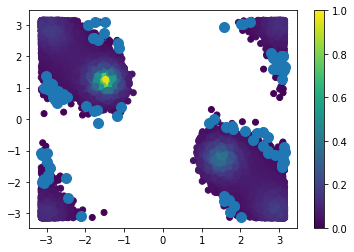

In [66]:
df = probabilities[probabilities['invloglik'] < 0.2].sample(100)
plt.scatter(probabilities['phi'], probabilities['psi'], c=probabilities['invloglik'])
plt.scatter(df['phi'], df['psi'], s = 100)
plt.colorbar()

In [60]:
probabilities.sample(n=100, weights='invloglik').describe()


,loglik,phi,psi,frame,invloglik
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-1.203809,-0.614650,0.260873,2553.590000,1.291733
std,0.891057,1.771799,1.658136,1480.025983,0.745257
min,-3.911481,-3.110491,-3.076623,7.000000,0.255658
25%,-1.793501,-1.539811,-1.185259,999.000000,0.557577
50%,-0.926728,-1.439481,1.079389,2846.000000,1.079070
75%,-0.519102,1.427282,1.285500,3770.750000,1.926418
max,-0.384879,3.102113,3.111509,4959.000000,2.598220


In [63]:
probabilities[probabilities['invloglik'] < 0.5].sample(10)

,loglik,phi,psi,key,frame,invloglik
42284,-2.321921,1.422674,-1.811686,95dd99b2-204e-4592-8187-33ffa23e5b39,2284,0.430678
29201,-2.347095,2.747405,-3.114030,bf95d148-486b-4f0c-a7b9-0d052033e7bc,4201,0.426059
44187,-2.115923,-2.723827,2.589560,95dd99b2-204e-4592-8187-33ffa23e5b39,4187,0.472607
35630,-2.020824,-2.997094,3.069588,49123611-4e70-421f-a97f-5807ce2ceb49,630,0.494848
22184,-2.249942,3.037983,2.981412,049eba45-ead4-4927-b102-c0fcad792312,2184,0.444456
24935,-2.145188,3.119982,-3.020220,049eba45-ead4-4927-b102-c0fcad792312,4935,0.466160
1182,-2.988784,-2.855273,2.177335,09800e0a-c0b7-4ad5-9912-4ab24810708d,1182,0.334584
38461,-2.183311,2.677603,-2.591392,49123611-4e70-421f-a97f-5807ce2ceb49,3461,0.458020
34250,-3.057378,-0.905953,1.373931,3a2802a4-d63b-4caf-ad77-af88d9903139,4250,0.327078
38484,-4.562331,-1.686251,0.354354,49123611-4e70-421f-a97f-5807ce2ceb49,3484,0.219186


In [36]:
from prody import *
key = "42fb292b-d40d-4296-b944-a1030363b8ee"
dcd = f"dcd/name_{key}.dcd"
s = "ALA"
pdb = f"pdb/{s.lower()}-{key}-end.pdb"

In [37]:
traj = Trajectory(dcd)
print(traj)
structure = parsePDB(pdb)
traj.link(structure)

Trajectory dcd/name_42fb292b-d40d-4296-b944-a1030363b8ee.dcd


OSError: pdb/ala-42fb292b-d40d-4296-b944-a1030363b8ee-end.pdb is not a valid filename or a valid PDB identifier.

In [ ]:
frame = 4999
pdbOutFilename = f"{key}-{frame}.pdb"
writePDB(pdbOutFilename, traj[frame].getAtoms())

In [ ]:
plt.scatter(phi, psi, c=np.e**COLORs, cmap="Reds")


In [ ]:
x_new,y_new,z_new = phi_psi_torus(test_df["phi"], 
                                  test_df["psi"], 
                                  deg2rad=True)

In [ ]:
# np.array(list(itertools.product(zeroTo2pi,zeroTo2pi))).T.shape

In [ ]:
colors = ["burlywood"] * len(x)
CUSTOMDATA = ["q"] * len(x)

# for xn, yn, zn, phi, psi in zip(x_new,y_new,z_new, 
#                                 test_df["phi"],test_df["psi"]):
#     colors.append("crimson")
#     CUSTOMDATA.append(f"{phi:.2f},{psi:.2f}")  
# x = np.append(x, x_new)
# y = np.append(y, y_new)
# z = np.append(z, z_new)

In [ ]:
import plotly.graph_objects as go
import numpy as np


fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    hovertext = CUSTOMDATA,
    marker=dict(
        size=3,
        color=np.e**COLORs,                # set color to an array/list of desired values
        colorscale='reds',   # choose a colorscale
        opacity=1.,
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.write_html("test.html")

In [ ]:
# import plotly.graph_objects as go
# import numpy as np


# fig = go.Figure(data=[go.Surface(
#     x=x,
#     y=y,
#     z=z,
#     surfacecolor=np.e**COLORs
# )])

# # tight layout
# # fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
# fig.write_html("test.html")

In [ ]:
COLORs